In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [2]:
df = pd.read_csv(r'C:\Users\Apollos\Desktop\Cleaned Data Loans.csv', header=0, sep=",")

In [3]:
df

,Age,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,2,Unemployed,UK,0,45500,Rent,1,13234,Paid
1,66,13,Unemployed,UK,1080,18000,Own,0,5561,Paid
2,48,4,Self Employed,UK,3690,47500,Rent,1,28288,Paid
3,67,47,Self Employed,UK,6560,36000,Mortgage,0,30199,Paid
4,70,8,Self Employed,UK,9100,50500,Own,0,35078,Paid
...,...,...,...,...,...,...,...,...,...,...
1993,60,4,Self Employed,UK,2900,22500,Own,1,15725,Paid
1994,24,7,Self Employed,UK,5130,38000,Own,0,35911,Paid
1995,34,5,Unemployed,UK,6530,41500,Own,2,6874,Paid
1996,52,2,Employed,UK,930,32500,Own,0,5412,Paid


<AxesSubplot:xlabel='Outcome', ylabel='count'>

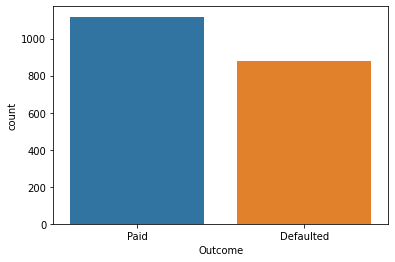

In [4]:
sns.countplot(x="Outcome", data=df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1998 non-null   int64 
 1   Years at address   1998 non-null   int64 
 2   Employment status  1998 non-null   object
 3   Country            1998 non-null   object
 4   Current debt       1998 non-null   int64 
 5   Income             1998 non-null   int64 
 6   Own home           1998 non-null   object
 7   CCJs               1998 non-null   int64 
 8   Loan amount        1998 non-null   int64 
 9   Outcome            1998 non-null   object
dtypes: int64(6), object(4)
memory usage: 156.2+ KB


In [6]:
df.isnull()


,Age,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1993,False,False,False,False,False,False,False,False,False,False
1994,False,False,False,False,False,False,False,False,False,False
1995,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()


Age                  0
Years at address     0
Employment status    0
Country              0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

In [95]:
home = pd.get_dummies(df['Own home'], drop_first=True)
home.head(5)

,Own,Rent
0,0,1
1,1,0
2,0,1
3,0,0
4,1,0


In [96]:
employment = pd.get_dummies(df['Employment status'], drop_first=True)
employment.head(5)

,Retired,Self Employed,Unemployed
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [97]:

 county = pd.get_dummies(df['Country'])
 county.head(5)   

,France,Germany,Spain,UK
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [98]:
Loans = pd.concat([df, home, employment, county], axis= 1)

In [99]:
Loans.head(5)

,Age,Years at address,Employment status,Country,Current debt,Income,Own home,CCJs,Loan amount,Outcome,Own,Rent,Retired,Self Employed,Unemployed,France,Germany,Spain,UK
0,19,2,Unemployed,UK,0,45500,Rent,1,13234,Paid,0,1,0,0,1,0,0,0,1
1,66,13,Unemployed,UK,1080,18000,Own,0,5561,Paid,1,0,0,0,1,0,0,0,1
2,48,4,Self Employed,UK,3690,47500,Rent,1,28288,Paid,0,1,0,1,0,0,0,0,1
3,67,47,Self Employed,UK,6560,36000,Mortgage,0,30199,Paid,0,0,0,1,0,0,0,0,1
4,70,8,Self Employed,UK,9100,50500,Own,0,35078,Paid,1,0,0,1,0,0,0,0,1


In [100]:
Loans.drop(['Employment status', 'Country', 'Own home'], axis=1, inplace=True)

In [101]:
Loans.head(5)

,Age,Years at address,Current debt,Income,CCJs,Loan amount,Outcome,Own,Rent,Retired,Self Employed,Unemployed,France,Germany,Spain,UK
0,19,2,0,45500,1,13234,Paid,0,1,0,0,1,0,0,0,1
1,66,13,1080,18000,0,5561,Paid,1,0,0,0,1,0,0,0,1
2,48,4,3690,47500,1,28288,Paid,0,1,0,1,0,0,0,0,1
3,67,47,6560,36000,0,30199,Paid,0,0,0,1,0,0,0,0,1
4,70,8,9100,50500,0,35078,Paid,1,0,0,1,0,0,0,0,1


Train Data


In [102]:
X= Loans.drop("Outcome", axis=1)
y= Loans["Outcome"]

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression



In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix

    
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


confusion_matrix(y_test, predictions)


array([[113,  68],
       [ 53, 166]], dtype=int64)

In [111]:
accuracy_score(y_test, predictions)

0.6975

# Decision Tree

In [107]:
Treemodel = DecisionTreeClassifier()
Treemodel.fit(X_train, y_train)
Tree_predictions = Treemodel.predict(X_test)

confusion_matrix(y_test, Tree_predictions)

array([[124,  57],
       [ 67, 152]], dtype=int64)

In [108]:
accuracy_score(y_test, Tree_predictions)

0.69


# Random Forest

In [109]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# rf.score(X_test,y_test)
confusion_matrix(y_test, rf_predictions)

array([[123,  58],
       [ 37, 182]], dtype=int64)

In [110]:
accuracy_score(y_test, rf_predictions)

0.7625

# ROC Curve

In [112]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
Treemodel_probs = Treemodel.predict_proba(X_test)
model_probs = model.predict_proba(X_test)

In [113]:
rf_probs = rf_probs[:, 1]
Treemodel_probs = Treemodel_probs[:, 1]
model_probs = model_probs[:, 1]

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score

In [115]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
Treemodel_auc = roc_auc_score(y_test, Treemodel_probs)
model_probs_auc = roc_auc_score(y_test, model_probs)

In [118]:
r_fpr, r_tpr,_ = roc_curve(y_test, r_probs, pos_label="Paid")
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs,pos_label="Paid")
Treemodel_fpr, Treemodel_tpr,_= roc_curve(y_test, Treemodel_probs,pos_label="Paid")
model_probs_fpr, model_probs_tpr, _= roc_curve(y_test, model_probs,pos_label="Paid")

In [120]:
import matplotlib.pyplot as plt


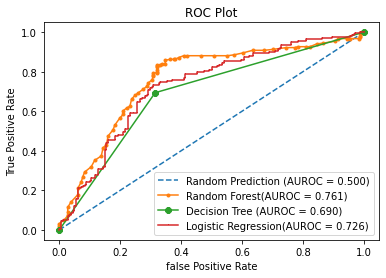

In [127]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(AUROC = %0.3f)' % rf_auc)
plt.plot(Treemodel_fpr, Treemodel_tpr, marker='8',label='Decision Tree (AUROC = %0.3f)' % Treemodel_auc)
plt.plot(model_probs_fpr, model_probs_tpr, marker=',', label='Logistic Regression(AUROC = %0.3f)' % model_probs_auc)




plt.title('ROC Plot')
plt.xlabel('false Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()